## Statistics 01
### Example code for finding statistics using a dictionary with three lists of integers.
#### Key concepts:
+ mean, mode, median, variance, standard deviation

#### Code overview:
+ Code samples built from matplotlib, numpy, pandas, scipy
+ Create a dictionary
+ Create a pandas DataFrame from the dictionary
+ Use describe() method to show statistics with original vertical view
+ Use describe() method to show statistics with transposed horizontal view
+ Show count, mean, mode, median
+ Show variance, standard deviation, standard error (optional use scipy or numpy)
+ Enable inline plotting with Jupyter magic
+ Graph histogram distribution of values in each group

In [22]:
# import needed libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats

In [28]:
# create a dictionary
d = {
    "grp_01": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6],
    "grp_02": [0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6],
    "grp_03": [0, 1, 2, 3, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,]
}
d

{'grp_01': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6],
 'grp_02': [0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6],
 'grp_03': [0, 1, 2, 3, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]}

In [29]:
# create pandas DataFrame from dictionary
df = pd.DataFrame(d)
df

,grp_01,grp_02,grp_03
0,0,0,0
1,0,1,1
2,0,1,2
3,0,2,3
4,0,2,4
5,0,2,5
6,0,3,6
7,0,3,6
8,0,3,6
9,0,3,6


In [30]:
# print statistics describing df (normal vertical format)
stats_v = df.describe()
stats_v

,grp_01,grp_02,grp_03
count,16.000000,16.000000,16.000000
mean,1.312500,3.000000,4.687500
std,2.056494,1.632993,2.056494
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,3.750000
50%,0.000000,3.000000,6.000000
75%,2.250000,4.000000,6.000000
max,6.000000,6.000000,6.000000


In [31]:
# print statistics describing df (transposed horizontal format)
stats_h = df.describe().T
stats_h

,count,mean,std,min,25%,50%,75%,max
grp_01,16.0,1.3125,2.056494,0.0,0.00,0.0,2.25,6.0
grp_02,16.0,3.0000,1.632993,0.0,2.00,3.0,4.00,6.0
grp_03,16.0,4.6875,2.056494,0.0,3.75,6.0,6.00,6.0


In [80]:
# calculate count, mean, median, mode
for key, val in d.items():
    a = np.array(val)
    n = len(a)
    mean = np.mean(a)
    median = np.median(a)
    mode = stats.mode(a) # mode has .mode and .count attributes
    print(f"{key} with {n} samples:\n\tmean={mean}\n\tmedian={median}\n\tmode={mode.mode}\n\tmode_count={mode.count}")

grp_01 with 16 samples:
	mean=1.3125
	median=0.0
	mode=[0]
	mode_count=[10]
grp_02 with 16 samples:
	mean=3.0
	median=3.0
	mode=[3]
	mode_count=[4]
grp_03 with 16 samples:
	mean=4.6875
	median=6.0
	mode=[6]
	mode_count=[10]


In [84]:
# calculate variance, standard deviation, standard error
for key, val in d.items():
    a = np.array(val)
    var = np.var(a, axis=None)
    s = np.std(a, ddof=1) # The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.
    sem = s / np.sqrt(n) # calculate standard error using numpy
#     sem = stats.sem(a) # calculate standard error using scipy
    print(f"{key} with {n} samples:\n\tvar={var}\n\tstandard deviation={s}\n\tstandard error={sem}")


grp_01 with 16 samples:
	var=3.96484375
	standard deviation=2.056493779875511
	standard error=0.5141234449688777
grp_02 with 16 samples:
	var=2.5
	standard deviation=1.632993161855452
	standard error=0.408248290463863
grp_03 with 16 samples:
	var=3.96484375
	standard deviation=2.056493779875511
	standard error=0.5141234449688777


In [85]:
# enable inline plotting in Jupyter notebook
%matplotlib inline

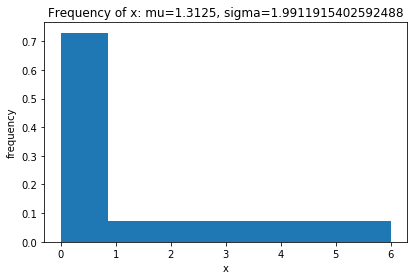

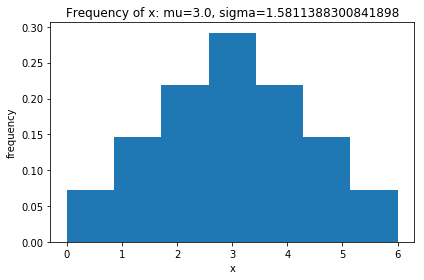

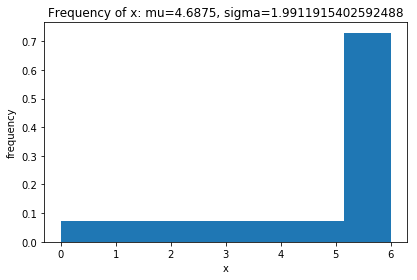

In [86]:
# graph histogram distribution of values in each group
for key, val in d.items():
    fig, ax = plt.subplots()
    num_bins = 7
    a = d[key]
    mu = np.mean(a)
    sigma = np.std(a)
    n, bins, patches = ax.hist(a, num_bins, density=1)
    ax.set_xlabel('x')
    ax.set_ylabel('frequency')
    ax.set_title(f'Frequency of x: mu={mu}, sigma={sigma}')
    fig.tight_layout()
    plt.show()